In [2]:
!pip install ultranest

  error: subprocess-exited-with-error
  
  × Building wheel for ultranest (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      C:\Users\sutir\AppData\Local\Temp\pip-build-env-f8fgki7a\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\sutir\AppData\Local\Temp\pip-build-env-f8fgki7a\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\calibrator.py -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\dychmc.py -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\dyhmc.py -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\flatnuts.py -> build\lib.win-amd64


  Using cached ultranest-4.4.0.tar.gz (2.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.11-cp311-cp311-win_amd64.whl (2.8 MB)
Failed to build ultranest



      no previously-included directories found matching 'docs\static\mcmc-demo'
      no previously-included directories found matching 'tests\reports'
      no previously-included directories found matching 'tests\.pytype'
      adding license file 'LICENSE'
      writing manifest file 'ultranest.egg-info\SOURCES.txt'
      copying ultranest\mlfriends.c -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\mlfriends.pyx -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\stepfuncs.c -> build\lib.win-amd64-cpython-311\ultranest
      copying ultranest\stepfuncs.pyx -> build\lib.win-amd64-cpython-311\ultranest
      running build_ext
      building 'ultranest.mlfriends' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ER

In [2]:
import numpy as np 
import scipy as sp  
import matplotlib.pyplot as plt  
import ultranest  
import ultranest.stepsampler as ultrastep  
from ultranest.plot import cornerplot

ModuleNotFoundError: No module named 'ultranest'

In [3]:
# I am writing a simple model for RC here (NFW DM halo + 
# one thin exponential disk for baryons).  NFW is modeled 
# using log(Rho_s/[M_sun/kpc^3]) and R_s/[kpc] as the free parameters 
# and for the exp disk, log(Sigmab = log(M_b/R_b^2/[M_sun/kpc^2]) and 
# R_b/kpc are the free parameters
import numpy as np
import scipy as sp
gravConst = 4.302*1.0e-6 # M_sun^-1 (km/s)^2 kpc
def v_NFW(logRhos, Rs, r): # km/s
    gr = np.log((Rs+r)/Rs) - (r/(Rs+r))
    mass = 4*np.pi*(10**logRhos)*gr*(Rs**3)
    return np.sqrt(gravConst*mass/r) 

def v_EXP(logSigmab, Rb, r): # km/s
    mb = 2.*np.pi*(Rb**2)*(10**logSigmab)
    mass = mb*(1 - (np.exp(-r/Rb)*(1 + (r/Rb))))
    y = r/(2*Rb)
    vsq = 2.*gravConst*(mb/Rb)*(y**2)*(sp.special.i0(y)*sp.special.k0(y) - sp.special.i1(y)*sp.special.k1(y))
    return np.sqrt(vsq)

C:\Users\sutir\AppData\Local\Temp\ipykernel_12864\1128024347.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(gravConst*mass/r)
C:\Users\sutir\AppData\Local\Temp\ipykernel_12864\1128024347.py:18: RuntimeWarning: invalid value encountered in multiply
  vsq = 2.*gravConst*(mb/Rb)*(y**2)*(sp.special.i0(y)*sp.special.k0(y) - sp.special.i1(y)*sp.special.k1(y))


Text(0.5, 1.0, 'TRGB (NFW DM halo + Exp bary disk)')

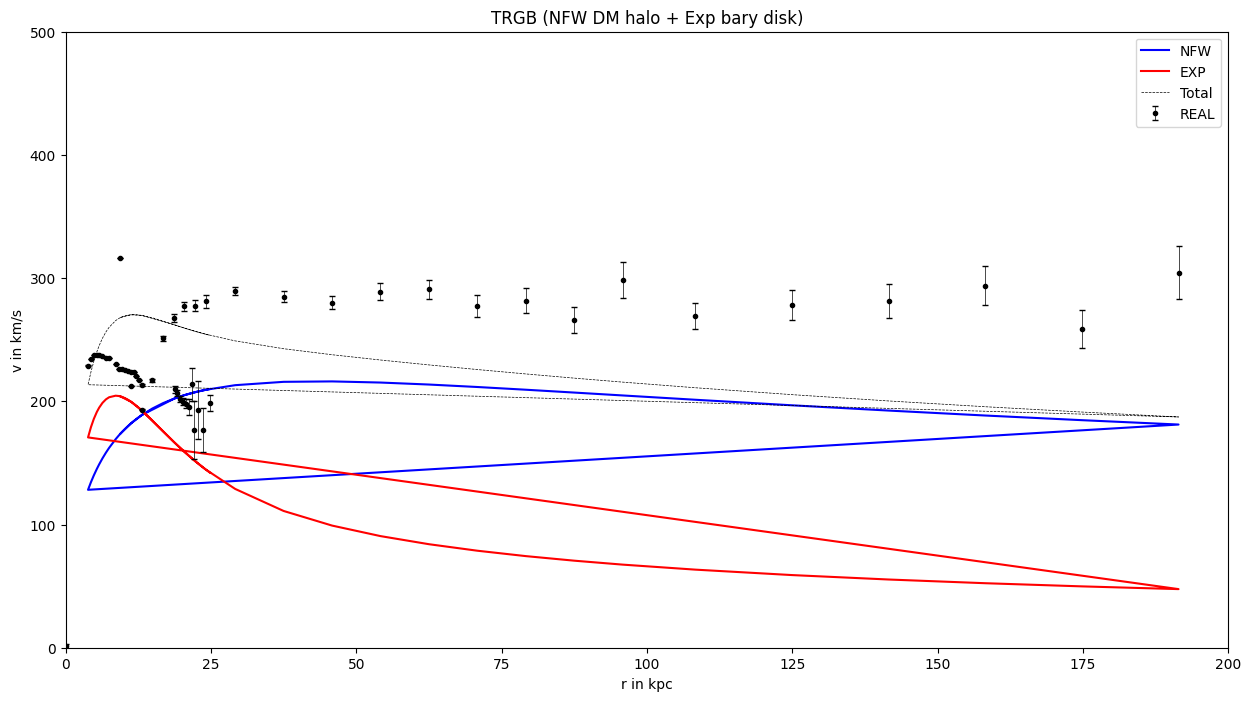

: 

In [ ]:
# Making a mock RC data (Use your real data instead)

data1 = np.loadtxt('TRGB.txt')
 
data2 = np.loadtxt('RV+Eilers.txt')       


# Extract the necessary columns from data1
mw_r1, v_final1, v_err1 = data1[:, 0], data1[:, 1], data1[:, 2]

mw_r2, v_final2, v_err2 = data2[:, 0], data2[:, 1] ,data2[:,2]

# Combine data1 and data2 for v_final and v_err
v_final = np.concatenate((v_final1, v_final2))
v_err = np.concatenate((v_err1, v_err2))

# You can assign mw_r from data1 and create a combined set
# Note: Ensure that mw_r in both datasets is consistent in length
mw_r = np.concatenate((mw_r1, mw_r2))  # Or use another logic if required

# Now mw_r, v_final, and v_err hold the concatenated data






mock_logRhos, mock_Rs = 7.0, 20.0
mock_logSigmab, mock_Rb = 9.0, 4.0

v_dark = v_NFW(mock_logRhos, mock_Rs, mw_r)
v_bary = v_EXP(mock_logSigmab, mock_Rb, mw_r)
v_tot = np.sqrt(v_dark**2 + v_bary**2)
# 5% error and adding noise 


plt.figure(figsize=(15,8))
plt.plot(mw_r, v_dark, c='b', label='NFW')
plt.plot(mw_r, v_bary, c='r', label='EXP')
plt.plot(mw_r, v_tot, c='k', ls='--', lw=0.5, label='Total')
plt.errorbar(mw_r, v_final, v_err, c='k', fmt='.', capsize=2, elinewidth=-0.5, label='REAL')
plt.legend()
plt.xlabel('r in kpc')
plt.ylabel('v in km/s')
plt.xlim(0,200)
plt.ylim(0,500)
plt.title('TRGB (NFW DM halo + Exp bary disk)')

Text(0.5, 1.0, 'TRGB (NFW DM halo + Exp bary disk)')

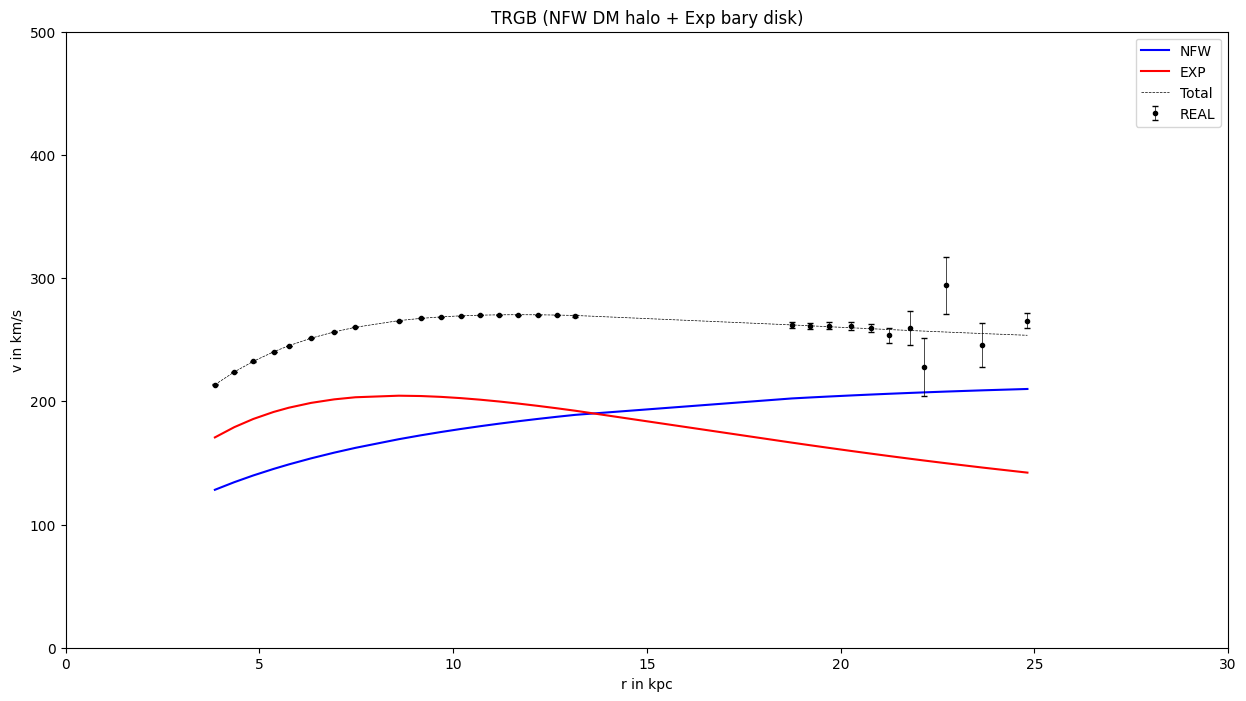

In [19]:
# Making a mock RC data (Use your real data instead)

data1 = np.loadtxt('RV+Eilers.txt')
        

mw_r,v_final,v_err , = data1[:, 0], data1[:, 1] ,data1[:,2]



mock_logRhos, mock_Rs = 7.0, 20.0
mock_logSigmab, mock_Rb = 9.0, 4.0

v_dark = v_NFW(mock_logRhos, mock_Rs, mw_r)
v_bary = v_EXP(mock_logSigmab, mock_Rb, mw_r)
v_tot = np.sqrt(v_dark**2 + v_bary**2)
# 5% error and adding noise 

v_noise = np.random.normal(0, v_err)
v_final = v_tot + v_noise
plt.figure(figsize=(15,8))
plt.plot(mw_r, v_dark, c='b', label='NFW')
plt.plot(mw_r, v_bary, c='r', label='EXP')
plt.plot(mw_r, v_tot, c='k', ls='--', lw=0.5, label='Total')
plt.errorbar(mw_r, v_final, v_err, c='k', fmt='.', capsize=2, elinewidth=-0.5, label='REAL')
plt.legend()
plt.xlabel('r in kpc')
plt.ylabel('v in km/s')
plt.xlim(0,30)
plt.ylim(0,500)
plt.title('TRGB (NFW DM halo + Exp bary disk)')

In [9]:
# here I am setting up the model to fit, prior, and likelihood etc. for Ultranest

#RC data for fitting (Use your real data here)
r_data = mw_r
v_data = v_final
err_data = v_err

# defininig names for the params of the model
param_names = ['logRhos', 'Rs', 'logSigmab', 'Rb'] 

# range for parameter values in the order of param_names
ranges = [[5, 10], [1, 30], [5, 10], [1, 10]]

# defining prior for the parameters. Here I am using uniform priors. 
# see documentation of Ultranest for examples of other priors
def prior(cube):
    params = cube.copy()
    for i, key in enumerate(param_names):
        fid = ranges[i]
        params[i] = cube[i]*(fid[1] - fid[0]) + fid[0]
    return params

# defining the log-likelihood function (chi_sq/2.) .
def llike(params):
    # here impliment additional constrains on params if need to (for eg. 
    # let's say Rb > 2)
    # if params[3] > 1:
    #     return -1e38  
    vmodel =  np.sqrt(v_NFW(params[0], params[1], r_data)**2+ v_EXP(params[2], params[3], r_data)**2)
    ll = -0.5*(((v_data - vmodel)/(err_data))**2).sum()
    return ll

# define a root path to save results of ultranest run (PLEASE CHANGE THIS)
ultraroot = '../../Output/Ultra/Example'

sampler = ultranest.ReactiveNestedSampler(param_names, llike, prior,
                                          log_dir = ultraroot, 
                                          resume = 'overwrite')      

NameError: name 'ultranest' is not defined

In [135]:
result = sampler.run()         
result['posterior']['mean']                   

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4  47 [-4.6159..-4.6156]*| it/evals=6920/32328 eff=21.6738% N=400       0  0 0  0 
[ultranest] Likelihood function evaluations: 32343
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -17.27 +- 0.1317
[ultranest] Effective samples strategy satisfied (ESS = 2230.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.


[7.077225916004933, 18.095664390434713, 8.933187518967726, 4.408906470802509]

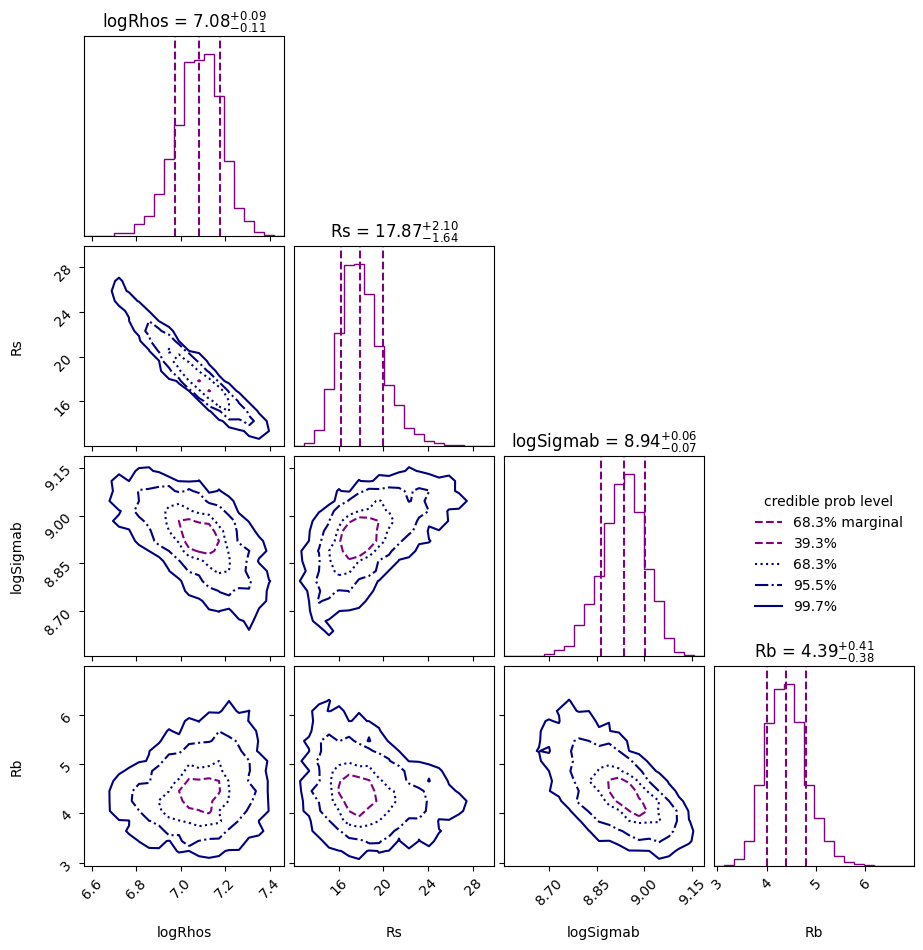

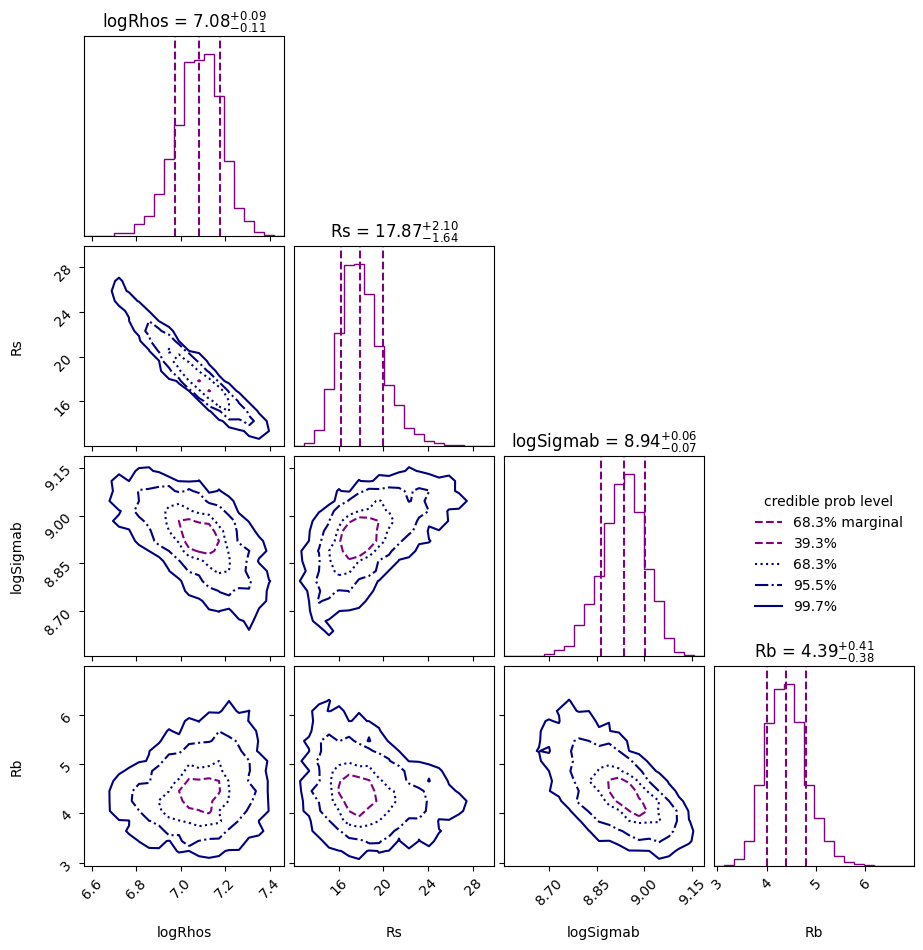

In [136]:
cornerplot(result)